import libraries

In [1]:
# Import Pandas and Numpy to provide DataFrame support
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np

# Use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("darkgrid")

font = {'size'   : 12}
mpl.rc('font', **font)

# Use Folium to display the Maps for Visualisation
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from folium import plugins

# Module to convert an address into latitude and longitude values
from geopy.geocoders import Nominatim

In [2]:
# All the SciKit Learn Libraries Required
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score

def cross_validate(model, n_splits = 10):
    
    k_fold = KFold(n_splits = n_splits)
    scores = [model.fit(X[train], y[train]).score(X[test], y[test]) for train, test in k_fold.split(X)]
    
    scores = np.percentile(scores, [40, 50, 60])
    return scores

### Import and process the Chicago Crime San Francisco


In [3]:
# These are the columns that we want to keep.
# Columns not listed here won't be imported, speeding things up.
crime_keep_columns = [
                      'Dates',
                      'Category', 
                      'Descript',
                      'DayOfWeek',
                      'PdDistrict',
                      'Resolution',
                       'Address',
                       'Latitude',
                      'Longitude']



# Read from local
df = pd.read_csv('C:/Users/jonathan/Desktop/Coursera_Capstone/train.csv',
                 usecols=crime_keep_columns)

In [4]:
df.shape


(878049, 9)

In [5]:
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,Latitude,Longitude
0,5/13/2015 23:53,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,5/13/2015 23:53,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,5/13/2015 23:33,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,5/13/2015 23:30,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,5/13/2015 23:30,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [6]:
df.tail()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,Latitude,Longitude
878044,1/6/2003 0:15,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056
878045,1/6/2003 0:01,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447363,37.731948
878046,1/6/2003 0:01,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266
878047,1/6/2003 0:01,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607
878048,1/6/2003 0:01,FORGERY/COUNTERFEITING,"CHECKS, FORGERY (FELONY)",Monday,BAYVIEW,NONE,1800 Block of NEWCOMB AV,-122.394926,37.738212


#### Clean up the data and prepare¶


In [7]:
df['Dates'] =  pd.to_datetime(df['Dates'], format='%m/%d/%Y %H:%M')


Add new columns for the hour, day, month and year of the crime:

Hour 

Day Name 

Day of week 

Month Name

Month Number 

Year

Year and Month

In [8]:
df['hour'] = df['Dates'].dt.hour
df['day_name'] = df['Dates'].dt.day_name()
df['day'] = df['Dates'].dt.dayofweek + 1
df['month_name'] = df['Dates'].dt.month_name()
df['month'] = df['Dates'].dt.month
df['year'] = df['Dates'].dt.year
df['year_month'] = df['Dates'].dt.to_period('M')

In [9]:
df.isna().sum()


Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
Latitude      0
Longitude     0
hour          0
day_name      0
day           0
month_name    0
month         0
year          0
year_month    0
dtype: int64

In [10]:
df.dropna(inplace=True)
df.reindex()
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,Latitude,Longitude,hour,day_name,day,month_name,month,year,year_month
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23,Wednesday,3,May,5,2015,2015-05
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23,Wednesday,3,May,5,2015,2015-05
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,23,Wednesday,3,May,5,2015,2015-05
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,23,Wednesday,3,May,5,2015,2015-05
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,23,Wednesday,3,May,5,2015,2015-05


#### Data Visualisation


#### Number of Crimes per month


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

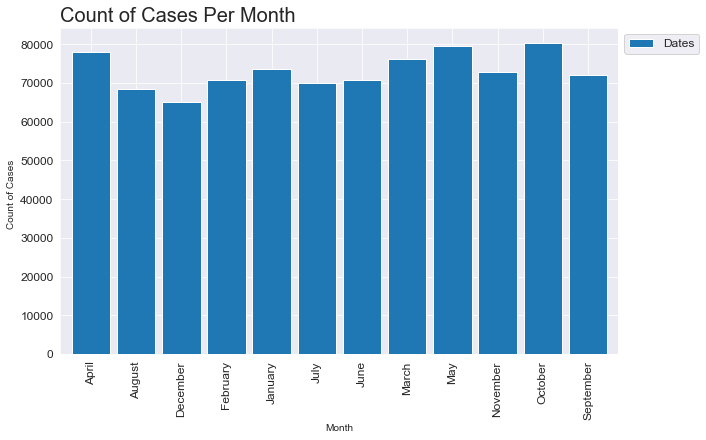

In [11]:
df.groupby('month_name').count().plot(y = 'Dates', 
                                      kind='bar',
                                      figsize=(10,6),
                                      width=0.85,
                                      fontsize=12,
                                      colormap='tab20').legend(bbox_to_anchor=(1,1),
                                                               prop={'size': 12})

plt.xlabel('Month')
plt.ylabel('Count of Cases  ')
plt.title('Count of Cases Per Month', loc='left', fontsize=20)
plt.xticks(rotation=90)

##### Number of crimes occuring on each day


Text(0.0, 1.0, 'Count of Cases Per Day of Week')

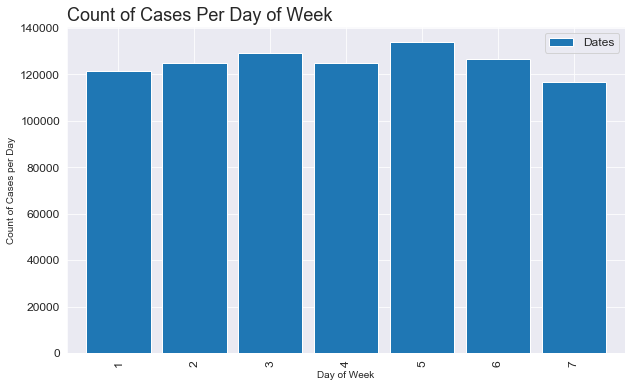

In [12]:
df.groupby('day').count().plot(y = 'Dates',
                               kind='bar',
                               figsize=(10,6),
                               width=0.85,
                               fontsize=12,
                               colormap='tab20').legend(bbox_to_anchor=(1,1),
                                                        prop={'size': 12})

plt.xlabel('Day of Week')
plt.ylabel('Count of Cases per Day')
plt.title('Count of Cases Per Day of Week', loc='left', fontsize=18)

#### Number of crimes occuring in each hour


Text(0.0, 1.0, 'Count of Cases Per Hour]')

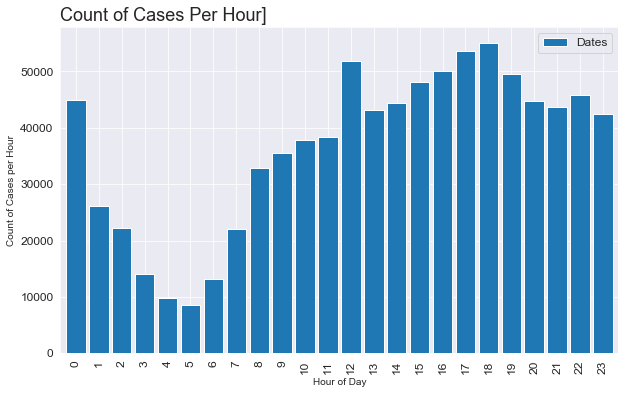

In [13]:
df.groupby('hour').count().plot(y = 'Dates',
                               kind='bar',
                               figsize=(10,6),
                               width=0.85,
                               fontsize=12,
                               colormap='tab20').legend(bbox_to_anchor=(1,1),
                                                        prop={'size': 12})

plt.xlabel('Hour of Day')
plt.ylabel('Count of Cases per Hour')
plt.title('Count of Cases Per Hour]', loc='left', fontsize=18)

#### Number of crimes occuring in each year


Text(0.0, 1.0, 'Count of Cases Per year]')

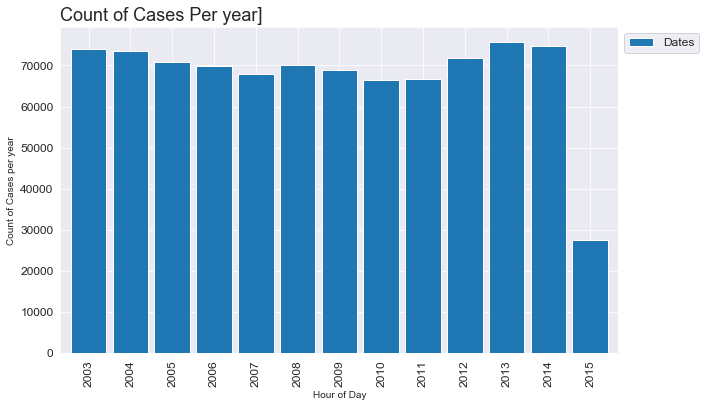

In [14]:
df.groupby('year').count().plot(y = 'Dates',
                               kind='bar',
                               figsize=(10,6),
                               width=0.85,
                               fontsize=12,
                               colormap='tab20').legend(bbox_to_anchor=(1,1),
                                                        prop={'size': 12})

plt.xlabel('Hour of Day')
plt.ylabel('Count of Cases per year')
plt.title('Count of Cases Per year]', loc='left', fontsize=18)

In [20]:
# Number of unique Crime categories bases on the Primary Description
df.Descript.nunique()


879

In [21]:
# What Crimes are the 3 most commonly occuring ones 
df[['Descript', 'Dates']].groupby(
    ['Descript'], as_index=False).count().sort_values(
    'Dates', ascending=False).head(3)

,Descript,Dates
404,GRAND THEFT FROM LOCKED AUTO,60022
476,LOST PROPERTY,31729
134,BATTERY,27441


In [22]:
# Create a list of the 10 most commonly occuring crimes
top_crimes = df[['Descript', 'Dates']].groupby(
    ['Descript']).count().sort_values('Dates', ascending=False)[:10].axes[0].tolist()

# Create a list of the 3 most commonly occuring crimes
top_three_crimes = df[['Descript', 'Dates']].groupby(
    ['Descript']).count().sort_values('Dates', ascending=False)[:3].axes[0].tolist()

# Create a list of the 2 most commonly occuring crimes
top_two_crimes = df[['Descript', 'Dates']].groupby(
    ['Descript']).count().sort_values('Dates', ascending=False)[:2].axes[0].tolist()

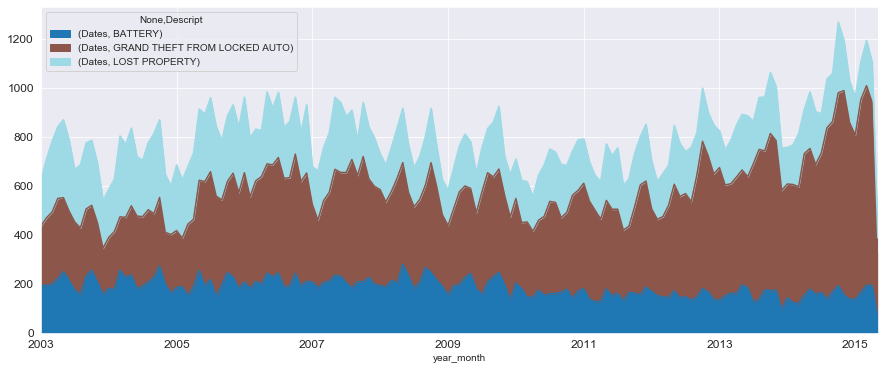

In [23]:
# Create a new data frame with just the top 10 crimes
df_top_crimes = df[df['Descript'].isin(top_crimes)].copy()

# Create a new data frame with just the top 10 crimes
df_top3_crimes = df[df['Descript'].isin(top_three_crimes)].copy()

df_top3_crimes[['Dates', 'Descript', 'year_month']].pivot_table(
    index='year_month', 
    columns='Descript', 
    fill_value=0, 
    aggfunc='count').plot(kind='area',
                          stacked=True,
                          figsize=(15, 6),
                               fontsize=12,
                               colormap='tab20')

Text(0.0, 1.0, 'Count of Cases Per Hour]')

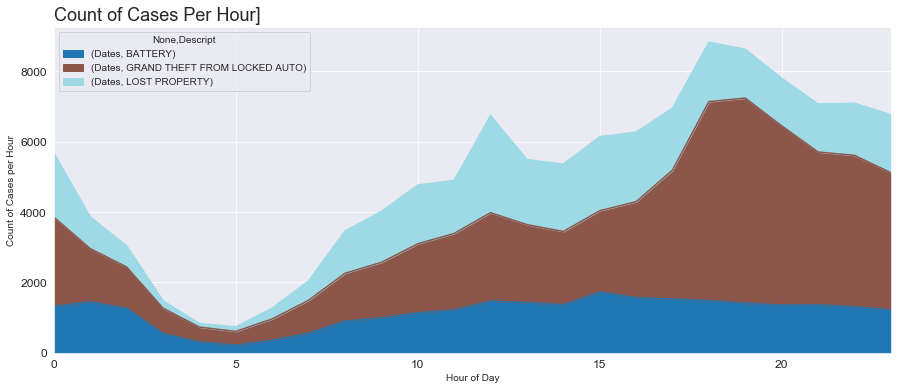

In [24]:
df_top3_crimes[['Dates', 'Descript', 'hour']].pivot_table(
    index='hour', 
    columns='Descript', 
    fill_value=0, 
    aggfunc='count').plot(kind='area',
                          stacked=True,
                          figsize=(15, 6),
                               fontsize=12,
                               colormap='tab20')

plt.xlabel('Hour of Day')
plt.ylabel('Count of Cases per Hour')
plt.title('Count of Cases Per Hour]', loc='left', fontsize=18)

#### Visual Crimes on map of San francisco


In [25]:
df_top_crimes.dtypes


Dates         datetime64[ns]
Category              object
Descript              object
DayOfWeek             object
PdDistrict            object
Resolution            object
Address               object
Latitude             float64
Longitude            float64
hour                   int64
day_name              object
day                    int64
month_name            object
month                  int64
year                   int64
year_month         period[M]
dtype: object

#### Create a folium map with a different colour per crime


In [26]:
# We have  list of the top 10 crimes from earlier
colors = [
    'red',
    'blue',
    'gray',
    'orange',
    'beige',
    'green',
    'purple',
    'pink',
    'cadetblue',
    'black'
]

# Create a dictionary of colours to map to the crimes
dict_colours = dict(zip(top_crimes, colors))

# Add the colours colums to the df_top_crimes DataFrame
df_top_crimes['colour'] = df_top_crimes.Descript.map(dict_colours)

The entire df_top_crimes DataFrame contains too many point to disply effeciently using Folium. To combat this we will just use the data from August .

In [27]:
df_top_crimes_august = df_top_crimes[df_top_crimes.month_name == 'August']

# Pickle the DataFrame to Separate the Folium Maps into a Separate Notepad
df_top_crimes_august.to_pickle('crimes_august.pkl')


In [34]:
# Define san francisco's geolocation coordinates
sf_latitude = 41.85  
sf_longitude = -87.75

# Define the world map centered around san francisco with a higher zoom level
sf_map = folium.Map(location=[sf_latitude, sf_longitude], zoom_start=11)

# display world map
sf_map

# Instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, col in zip(df_top_crimes_august.Latitude, 
                         df_top_crimes_august.Longitude, 
                         df_top_crimes_august.colour):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=1, # define how big you want the circle markers to be
            color=col,
            fill=True,
            fill_color=col,
            fill_opacity=0.6
        )
    )

# add incidents to map
sf_map.add_child(incidents)


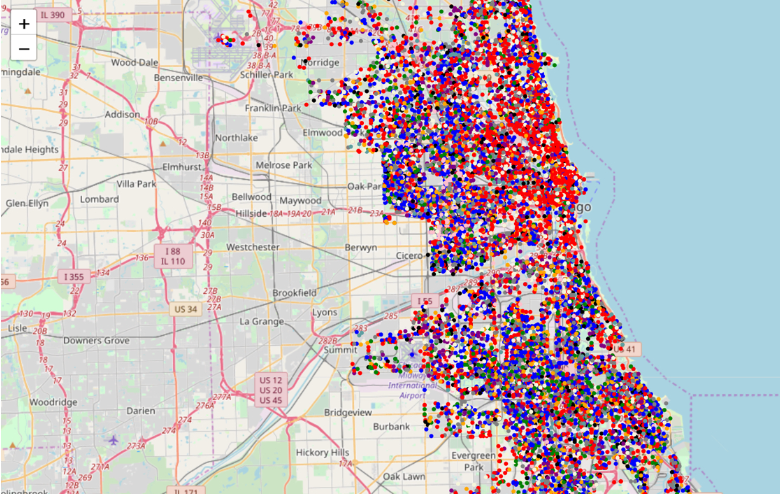

In [35]:
mc = MarkerCluster()

# Define the world map centered around Chicago with a higher zoom level
sf_cluster = folium.Map(location=[sf_latitude, sf_longitude], zoom_start=11)

# display world map
sf_cluster

#creating a Marker for each point in df_sample. Each point will get a popup with their zip
for row in df_top_crimes_august.itertuples():
    mc.add_child(folium.Marker(
        location=[row.Latitude,  row.Longitude],
                 popup=row.Descript))

#sf_cluster.add_child(mc)
#sf_cluster

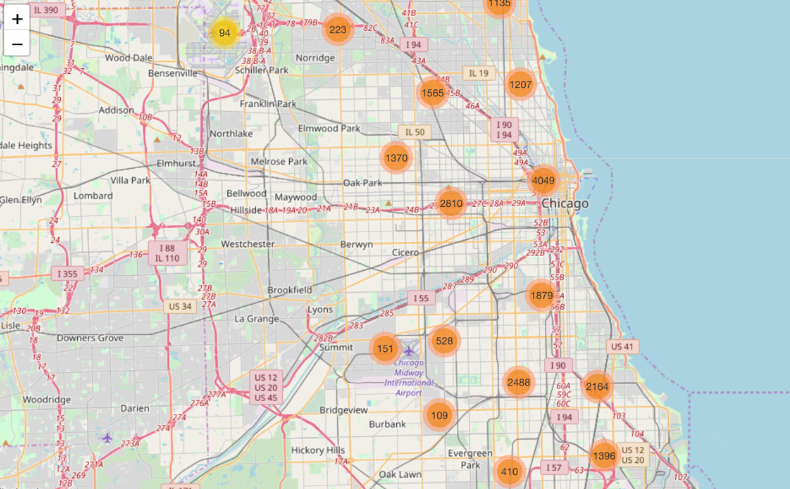

In [36]:
from folium import plugins
from folium.plugins import HeatMap

sf_heatmat = folium.Map(location=[sf_latitude, sf_longitude], zoom_start=11) 

# List comprehension to make out list of lists
heat_data = [[row['Latitude'], 
              row['Longitude']] for index, row in df_top_crimes_august.iterrows()]

# Plot it on the map
HeatMap(heat_data,
        min_opacity=0.5,
        max_zoom=18, 
        max_val=1.0, 
        radius=15,
        blur=20,
        gradient=None,
        overlay=True).add_to(sf_heatmat)

Display the map
sf_heatmat

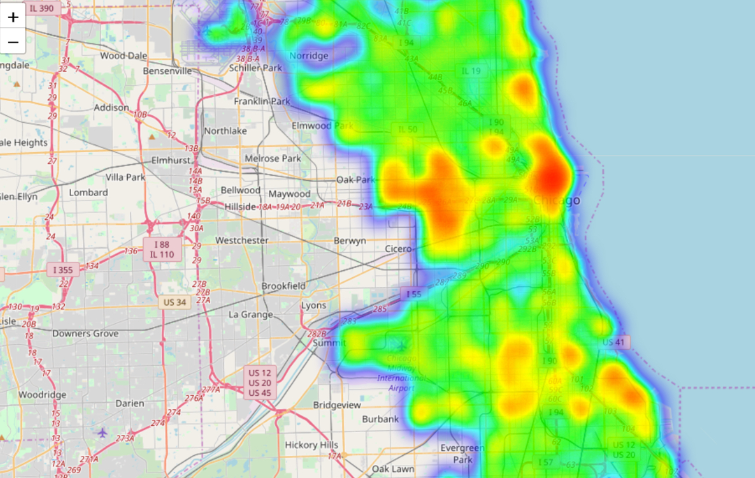

In [67]:
df_top_crimes.dtypes


Dates         datetime64[ns]
Category              object
Descript              object
DayOfWeek             object
PdDistrict            object
Resolution            object
Address               object
Latitude             float64
Longitude            float64
hour                   int64
day_name              object
day                    int64
month_name            object
month                  int64
year                   int64
year_month         period[M]
colour                object
dtype: object

#### Data Preparation for Modelling


In [69]:
# Start by copying the Latitude and Longitude to the new DataFrame
df_features = df_top_crimes[['Latitude', 'Longitude']]

# Next and One Hot Encoding of the hour, day and month variables
df_features = df_features.join(pd.get_dummies(df_top_crimes.hour, prefix='hour'))
df_features = df_features.join(pd.get_dummies(df_top_crimes.day_name))
df_features = df_features.join(pd.get_dummies(df_top_crimes.month_name))

#, copied from the original Primary Description column
df_features['crimes'] = df_top_crimes[['Descript']]

In [70]:
df_features.head()


,Latitude,Longitude,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September,crimes
0,-122.425892,37.774599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,WARRANT ARREST
3,-122.426995,37.800873,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,GRAND THEFT FROM LOCKED AUTO
4,-122.438738,37.771541,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,GRAND THEFT FROM LOCKED AUTO
6,-122.423327,37.725138,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,STOLEN AUTOMOBILE
7,-122.371274,37.727564,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,STOLEN AUTOMOBILE


In [71]:
# Create a smaller DataFrame of only the top three crimes
df_features_3 = df_features[df_features['crimes'].isin(top_three_crimes)].copy()

# Create a smaller DataFrame of only the top two crimes
df_features_2 = df_features[df_features['crimes'].isin(top_two_crimes)].copy()

In [72]:
X_10 = df_features.copy()
y_10 = X_10.crimes.values

X_10.drop('crimes', axis=1, inplace=True)
X_10 = preprocessing.StandardScaler().fit(X_10).transform(X_10)


X_3 = df_features_3.copy()
y_3 = X_3.crimes.values

X_3.drop('crimes', axis=1, inplace=True)
X_3 = preprocessing.StandardScaler().fit(X_3).transform(X_3)

X_2 = df_features_2.copy()
y_2 = X_2.crimes.values

X_2.drop('crimes', axis=1, inplace=True)
X_2 = preprocessing.StandardScaler().fit(X_2).transform(X_2)

In [73]:
# Set X = X_10
X = X_10
y = y_10

In [74]:

# Set X = X_3
X = X_3
y = y_3

In [75]:
# Set X = X_2
X = X_2
y = y_2

#### KNN

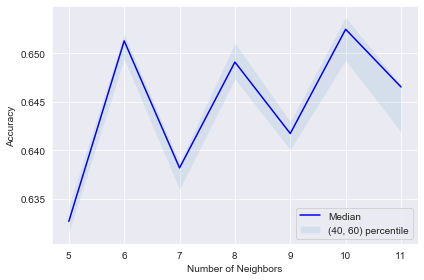

In [77]:
# Number of neighbours
neighs = range(5, 12)

# Store the scores
scores = np.zeros((len(neighs), 3))

for idx, neigh in enumerate(neighs):
    #print('Heighbours: ', neigh, ' ', str(datetime.now()))
    model = KNeighborsClassifier(n_neighbors = neigh)
    scores[idx, : ] = cross_validate(model, n_splits = 5)

plt.plot(neighs, scores[ : , 1], 'b')
plt.fill_between(neighs, scores[ : , 0], scores[:, 2], alpha = 0.1)
plt.legend(('Median', '(40, 60) percentile'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.tight_layout()
plt.show()

#### Decision tree

Depth:  10   2019-12-25 00:20:09.157287
Depth:  11   2019-12-25 00:20:20.045561
Depth:  12   2019-12-25 00:20:33.005138
Depth:  13   2019-12-25 00:20:45.522953
Depth:  14   2019-12-25 00:20:57.588202
Depth:  15   2019-12-25 00:21:09.788055


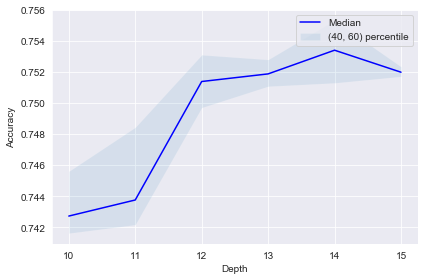

In [78]:
from datetime import datetime
from sklearn.tree import DecisionTreeClassifier

depths = range(10, 16)
scores = np.zeros((len(depths), 3))
# scores = np.zeros((len(depths), 2))
for idx, depth in enumerate(depths):
    print('Depth: ', depth, ' ', str(datetime.now()))
    model = DecisionTreeClassifier(criterion = "entropy", max_depth = depth)
    scores[idx, : ] = cross_validate(model, n_splits = 10)

plt.plot(depths, scores[ : , 1], 'b')
plt.fill_between(depths, scores[ : , 0], scores[:, 2], alpha = 0.1)
plt.legend(('Median', '(40, 60) percentile'))
plt.ylabel('Accuracy')
plt.xlabel('Depth')
plt.tight_layout()
plt.show()

C:  0.01   2019-12-25 00:24:29.129142
C:  0.03162277660168379   2019-12-25 00:24:42.278167
C:  0.1   2019-12-25 00:24:53.668640
C:  0.31622776601683794   2019-12-25 00:25:05.394922
C:  1.0   2019-12-25 00:25:17.566947
C:  3.1622776601683795   2019-12-25 00:25:31.548018


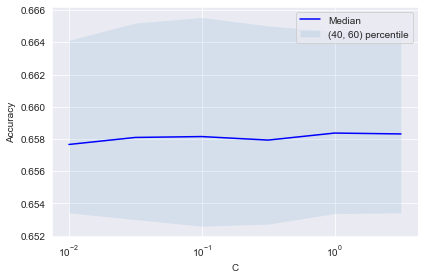

In [79]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

C = np.logspace(-2.0, 0.5, num = 6, endpoint = True)
scores = np.zeros((len(C), 3))
for idx, c in enumerate(C):
    print('C: ', c, ' ', str(datetime.now()))
    model = LogisticRegression(C = c, solver = 'liblinear')
    scores[idx, : ] = cross_validate(model, n_splits = 10)

plt.plot(C, scores[ : , 1], 'b')
plt.xscale('log')
plt.fill_between(C, scores[ : , 0], scores[:, 2], alpha = 0.1)
plt.legend(('Median', '(40, 60) percentile'))
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.tight_layout()
plt.show()

Alpha:  0.1   2019-12-25 00:31:40.007424
Alpha:  0.2   2019-12-25 00:31:46.495388
Alpha:  0.30000000000000004   2019-12-25 00:31:52.495594
Alpha:  0.4   2019-12-25 00:31:58.136362
Alpha:  0.5   2019-12-25 00:32:03.897063
Alpha:  0.6   2019-12-25 00:32:10.230432
Alpha:  0.7000000000000001   2019-12-25 00:32:16.521828
Alpha:  0.8   2019-12-25 00:32:22.900140
Alpha:  0.9   2019-12-25 00:32:28.623861
Alpha:  1.0   2019-12-25 00:32:34.239642


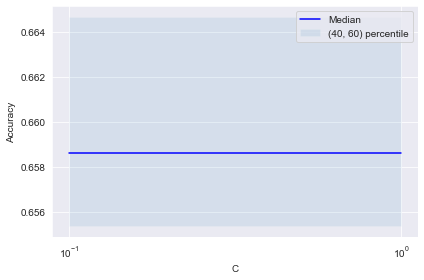

In [80]:

alpha = np.linspace(0.1, 1, num=10)
scores = np.zeros((len(alpha), 3))
for idx, a in enumerate(alpha):
    print('Alpha: ', a, ' ', str(datetime.now()))
    model = BernoulliNB()
    scores[idx, : ] = cross_validate(model, n_splits = 10)

plt.plot(alpha, scores[ : , 1], 'b')
plt.xscale('log')
plt.fill_between(alpha, scores[ : , 0], scores[:, 2], alpha = 0.1)
plt.legend(('Median', '(40, 60) percentile'))
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.tight_layout()
plt.show()

Estimator:  12   2019-12-25 00:33:50.154284
Estimator:  13   2019-12-25 00:34:18.305552
Estimator:  14   2019-12-25 00:34:49.733913
Estimator:  15   2019-12-25 00:35:24.974722
Estimator:  16   2019-12-25 00:36:00.722790
Estimator:  17   2019-12-25 00:36:35.687740


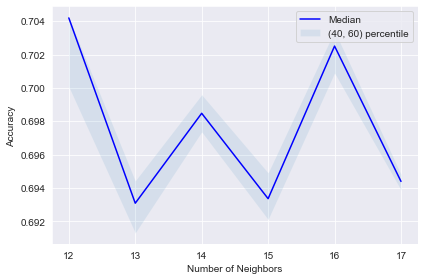

In [81]:
# Decision Forest using a Random Forest

est = range(12, 18)
scores = np.zeros((len(est), 3))
for idx, a in enumerate(est):
    print('Estimator: ', a, ' ', str(datetime.now()))
    model = RandomForestClassifier(n_estimators = a, max_features = 'sqrt')
    scores[idx, : ] = cross_validate(model, n_splits = 10)

plt.plot(est, scores[ : , 1], 'b')
plt.fill_between(est, scores[ : , 0], scores[:, 2], alpha = 0.1)
plt.legend(('Median', '(40, 60) percentile'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.tight_layout()
plt.show()

In [82]:
def cross_validate_02(model, n_splits = 10):

    Ks = 10
    mean_acc = np.zeros((Ks-1))
    std_acc = np.zeros((Ks-1))
    ConfustionMx = [];
    for n in range(1,Ks):

        #Train Model and Predict
        k_fold = KFold(n_splits = n_splits)
        for train, test in k_fold.split(X):
            neigh = KNeighborsClassifier(n_neighbors = n).fit(X[train], y[train])
            yhat=neigh.predict(X[test])
            mean_acc[n-1] = metrics.accuracy_score(y[test], yhat)
            std_acc[n-1]=np.std(yhat==y[test])/np.sqrt(yhat.shape[0])

    mean_acc
    
def cross_validate(model, n_splits = 10):
    
    k_fold = KFold(n_splits = n_splits)
    scores = [model.fit(X[train], y[train]).score(X[test], y[test]) for train, test in k_fold.split(X)]
    
    scores = np.percentile(scores, [40, 50, 60])
    return scores

In [100]:
import yaml

dict_file = [{'client_id' : ['ILSDIMGM4OOZ241LFUQRHHWYT2EDSOYSE4ZVNKIIVPT0MIE0']},
{'client_secret' : ['NPY1CCT3NZTR1255TZE3DOSXKSNITRI5AFGFCURFEPOQ3E1J']}]

with open(r'C:/Users/jonathan/Desktop/Coursera_Capstone/config.yaml', 'w') as file:
    documents = yaml.dump(dict_file, file)

In [105]:
import yaml

with open("C:/Users/jonathan/Desktop/Coursera_Capstone/config.yaml", "r") as f:
    cfg = yaml.load(f)
 
 
search_params = {
    'client_id': cfg["client_id"],
    'client_secret': cfg['client_secret'],
    'intent': 'browse',
    'limit': 50,
    'v': cfg['version']
}

C:\Users\jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


In [106]:
import requests

page = requests.get("https://foursquare.com/explore?mode=url&near=Chicago%2C%20IL%2C%20United%20States&nearGeoId=72057594042815334&q=Top%20Picks")

from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')
top_venues = soup.find_all('div', class_='venueDetails')

In [107]:
venue_columns = ['id', 
                 'score', 
                 'category', 
                 'name', 
                 'address',
                 'postalcode',
                 'city',
                 'href', 
                 'latitude', 
                 'longitude']

df_top_venues = pd.DataFrame(columns=venue_columns)

for venue in top_venues:
    venue_name = venue.find(target="_blank").get_text()
    venue_score = venue.find(class_="venueScore positive").get_text()
    venue_cat = venue.find(class_="categoryName").get_text()
    venue_href = venue.find(class_="venueName").h2.a['href']
    venue_id = venue_href.split('/')[-1]

    if 'promotedTipId' in venue_id: 
        continue
        
    # Get the properly formatted address and the latitude and longitude
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(
        venue_id, 
        cfg['client_id'],
        cfg['client_secret'],
        cfg['version'])
    
    result = requests.get(url).json()
    
    print(result)
    venue_address = result['response']['venue']['location']['address']
    venue_postalcode = result['response']['venue']['location']['postalCode']
    venue_city = result['response']['venue']['location']['city']
    venue_latitude = result['response']['venue']['location']['lat']
    venue_longitude = result['response']['venue']['location']['lng']
    
    df_top_venues = df_top_venues.append({'id': venue_id,
                                          'score': venue_score,
                                          'category': venue_cat,
                                          'name': venue_name,
                                          'address': venue_address,
                                          'postalcode': venue_postalcode,
                                          'city': venue_city,
                                          'href': venue_href,
                                          'latitude': venue_latitude,
                                          'longitude': venue_longitude}, ignore_index=True)

{'meta': {'code': 200, 'requestId': '5e03515a542890001b8ec746'}, 'response': {'venue': {'id': '42b75880f964a52090251fe3', 'name': 'Millennium Park', 'contact': {'phone': '3127421168', 'formattedPhone': '(312) 742-1168', 'twitter': 'millennium_park', 'facebook': '107993661288', 'facebookName': 'Millennium Park'}, 'location': {'address': '201 E Randolph St', 'crossStreet': 'btwn Columbus Dr & Michigan Ave', 'lat': 41.88311217282798, 'lng': -87.62385133673686, 'postalCode': '60601', 'cc': 'US', 'neighborhood': 'The Loop', 'city': 'Chicago', 'state': 'IL', 'country': 'United States', 'formattedAddress': ['201 E Randolph St (btwn Columbus Dr & Michigan Ave)', 'Chicago, IL 60601', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/millennium-park/42b75880f964a52090251fe3', 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, '

{'meta': {'code': 200, 'requestId': '5e035156edbcad001b42e04d'}, 'response': {'venue': {'id': '49e9ef74f964a52011661fe3', 'name': 'The Art Institute of Chicago', 'contact': {'phone': '3124433600', 'formattedPhone': '(312) 443-3600', 'twitter': 'artinstitutechi', 'instagram': 'artinstitutechi', 'facebook': '17179183149', 'facebookUsername': 'artic', 'facebookName': 'The Art Institute of Chicago'}, 'location': {'address': '111 S Michigan Ave', 'crossStreet': 'btwn Monroe St & Jackson Dr', 'lat': 41.87960961577188, 'lng': -87.62355247900402, 'postalCode': '60603', 'cc': 'US', 'neighborhood': 'Grant Park', 'city': 'Chicago', 'state': 'IL', 'country': 'United States', 'formattedAddress': ['111 S Michigan Ave (btwn Monroe St & Jackson Dr)', 'Chicago, IL 60603', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/the-art-institute-of-chicago/49e9ef74f964a52011661fe3', 'categories': [{'id': '4bf58dd8d48988d18f941735', 'name': 'Art Museum', 'pluralName': 'Art Museums', 'shortName': 'Ar

{'meta': {'code': 200, 'requestId': '5e035118211536001ba7f080'}, 'response': {'venue': {'id': '4c47533649fa9521cb1f5e62', 'name': 'Grant Park', 'contact': {'phone': '3127423918', 'formattedPhone': '(312) 742-3918'}, 'location': {'address': '337 E Randolph Dr', 'crossStreet': 'at Michigan Ave', 'lat': 41.8766257847394, 'lng': -87.61926269478862, 'labeledLatLngs': [{'label': 'display', 'lat': 41.8766257847394, 'lng': -87.61926269478862}], 'postalCode': '60601', 'cc': 'US', 'city': 'Chicago', 'state': 'IL', 'country': 'United States', 'formattedAddress': ['337 E Randolph Dr (at Michigan Ave)', 'Chicago, IL 60601', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/grant-park/4c47533649fa9521cb1f5e62', 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'verified': True, 'stats': {'tipCount': 126}, 'url':

{'meta': {'code': 200, 'requestId': '5e03514c69babe001b3e2136'}, 'response': {'venue': {'id': '4b9d15c5f964a520478e36e3', 'name': 'Chicago Riverwalk', 'contact': {}, 'location': {'address': 'Chicago River', 'lat': 41.88728, 'lng': -87.627217, 'labeledLatLngs': [{'label': 'display', 'lat': 41.88728, 'lng': -87.627217}], 'postalCode': '60601', 'cc': 'US', 'city': 'Chicago', 'state': 'IL', 'country': 'United States', 'formattedAddress': ['Chicago River', 'Chicago, IL 60601', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/chicago-riverwalk/4b9d15c5f964a520478e36e3', 'categories': [{'id': '56aa371be4b08b9a8d5734c3', 'name': 'Waterfront', 'pluralName': 'Waterfronts', 'shortName': 'Waterfront', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/river_', 'suffix': '.png'}, 'primary': True}, {'id': '4eb1d4dd4b900d56c88a45fd', 'name': 'River', 'pluralName': 'Rivers', 'shortName': 'River', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoo

{'meta': {'code': 200, 'requestId': '5e0351419388d7001b9066c2'}, 'response': {'venue': {'id': '4adfca6df964a520777d21e3', 'name': 'Symphony Center (Chicago Symphony Orchestra)', 'contact': {'phone': '3122943000', 'formattedPhone': '(312) 294-3000', 'twitter': 'chicagosymphony'}, 'location': {'address': '220 S Michigan Ave', 'crossStreet': 'btwn Adams & Jackson', 'lat': 41.87927535633318, 'lng': -87.62468041570357, 'labeledLatLngs': [{'label': 'display', 'lat': 41.87927535633318, 'lng': -87.62468041570357}], 'postalCode': '60604', 'cc': 'US', 'neighborhood': 'Chicago Loop, IL', 'city': 'Chicago', 'state': 'IL', 'country': 'United States', 'formattedAddress': ['220 S Michigan Ave (btwn Adams & Jackson)', 'Chicago, IL 60604', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/symphony-center-chicago-symphony-orchestra/4adfca6df964a520777d21e3', 'categories': [{'id': '5032792091d4c4b30a586d5c', 'name': 'Concert Hall', 'pluralName': 'Concert Halls', 'shortName': 'Concert Hall', 'i

{'meta': {'code': 200, 'requestId': '5e03511a1d67cb001bcaf7ec'}, 'response': {'venue': {'id': '4b06c066f964a52097ef22e3', 'name': "Binny's Beverage Depot", 'contact': {'phone': '3126644394', 'formattedPhone': '(312) 664-4394', 'facebook': '98167012448', 'facebookUsername': 'BinnysBev', 'facebookName': "Binny's"}, 'location': {'address': '1720 N Marcey St', 'crossStreet': 'at W Willow St', 'lat': 41.913048317903566, 'lng': -87.6553201675415, 'labeledLatLngs': [{'label': 'display', 'lat': 41.913048317903566, 'lng': -87.6553201675415}], 'postalCode': '60614', 'cc': 'US', 'city': 'Chicago', 'state': 'IL', 'country': 'United States', 'formattedAddress': ['1720 N Marcey St (at W Willow St)', 'Chicago, IL 60614', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/binnys-beverage-depot/4b06c066f964a52097ef22e3', 'categories': [{'id': '4bf58dd8d48988d186941735', 'name': 'Liquor Store', 'pluralName': 'Liquor Stores', 'shortName': 'Liquor Store', 'icon': {'prefix': 'https://ss3.4sqi.net

{'meta': {'code': 200, 'requestId': '5e03515760ba080025d56881'}, 'response': {'venue': {'id': '4aa05f40f964a520643f20e3', 'name': 'The Chicago Theatre', 'contact': {'phone': '3124626300', 'formattedPhone': '(312) 462-6300', 'twitter': 'chicagotheatre', 'instagram': 'chicagotheatre', 'facebook': '33238327740', 'facebookUsername': 'chicagotheatre', 'facebookName': 'The Chicago Theatre'}, 'location': {'address': '175 N State St', 'crossStreet': 'at E Lake St', 'lat': 41.8855389313031, 'lng': -87.6271507302385, 'labeledLatLngs': [{'label': 'display', 'lat': 41.8855389313031, 'lng': -87.6271507302385}], 'postalCode': '60601', 'cc': 'US', 'city': 'Chicago', 'state': 'IL', 'country': 'United States', 'formattedAddress': ['175 N State St (at E Lake St)', 'Chicago, IL 60601', 'United States']}, 'canonicalUrl': 'https://foursquare.com/chicagotheatre', 'categories': [{'id': '4bf58dd8d48988d137941735', 'name': 'Theater', 'pluralName': 'Theaters', 'shortName': 'Theater', 'icon': {'prefix': 'https:/

{'meta': {'code': 200, 'requestId': '5e0351333907e72fab4fc867'}, 'response': {'venue': {'id': '49dce128f964a520b65f1fe3', 'name': 'Garfield Park Conservatory', 'contact': {'phone': '7736381766', 'formattedPhone': '(773) 638-1766', 'twitter': 'gpconservatory'}, 'location': {'address': '300 N Central Park Ave', 'crossStreet': 'at Lake St', 'lat': 41.886259, 'lng': -87.717177, 'labeledLatLngs': [{'label': 'display', 'lat': 41.886259, 'lng': -87.717177}], 'postalCode': '60624', 'cc': 'US', 'city': 'Chicago', 'state': 'IL', 'country': 'United States', 'formattedAddress': ['300 N Central Park Ave (at Lake St)', 'Chicago, IL 60624', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/garfield-park-conservatory/49dce128f964a520b65f1fe3', 'categories': [{'id': '4bf58dd8d48988d15a941735', 'name': 'Garden', 'pluralName': 'Gardens', 'shortName': 'Garden', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/garden_', 'suffix': '.png'}, 'primary': True}], 'verified': T

{'meta': {'code': 200, 'requestId': '5e0351231835dd001b67c043'}, 'response': {'venue': {'id': '4b9511c7f964a520f38d34e3', 'name': 'Chicago Lakefront Trail', 'contact': {}, 'location': {'address': 'Lake Michigan Lakefront', 'crossStreet': 'at N Lakeshore Dr', 'lat': 41.967052938918144, 'lng': -87.6469087600708, 'labeledLatLngs': [{'label': 'display', 'lat': 41.967052938918144, 'lng': -87.6469087600708}], 'postalCode': '60611', 'cc': 'US', 'city': 'Chicago', 'state': 'IL', 'country': 'United States', 'formattedAddress': ['Lake Michigan Lakefront (at N Lakeshore Dr)', 'Chicago, IL 60611', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/chicago-lakefront-trail/4b9511c7f964a520f38d34e3', 'categories': [{'id': '4bf58dd8d48988d159941735', 'name': 'Trail', 'pluralName': 'Trails', 'shortName': 'Trail', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/hikingtrail_', 'suffix': '.png'}, 'primary': True}, {'id': '56aa371be4b08b9a8d5734c3', 'name': 'Waterfront',

{'meta': {'code': 200, 'requestId': '5e035108bae9a2001b3a5494'}, 'response': {'venue': {'id': '4b6cfef5f964a52026622ce3', 'name': 'Thalia Hall', 'contact': {}, 'location': {'address': '1807 S Allport St', 'crossStreet': 'at 18th St', 'lat': 41.85783222480576, 'lng': -87.65729185972937, 'labeledLatLngs': [{'label': 'display', 'lat': 41.85783222480576, 'lng': -87.65729185972937}], 'postalCode': '60608', 'cc': 'US', 'city': 'Chicago', 'state': 'IL', 'country': 'United States', 'formattedAddress': ['1807 S Allport St (at 18th St)', 'Chicago, IL 60608', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/thalia-hall/4b6cfef5f964a52026622ce3', 'categories': [{'id': '4bf58dd8d48988d1e9931735', 'name': 'Rock Club', 'pluralName': 'Rock Clubs', 'shortName': 'Rock Club', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/musicvenue_rockclub_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d1f2931735', 'name': 'Performing Arts Venue', 'pluralName': 

{'meta': {'code': 200, 'requestId': '5e03515b1e152c001b4fd9d2'}, 'response': {'venue': {'id': '4f2a0d0ae4b0837d0c4c2bc3', 'name': 'Publican Quality Meats', 'contact': {'phone': '3124960012', 'formattedPhone': '(312) 496-0012'}, 'location': {'address': '825 W Fulton Market', 'crossStreet': 'at Green', 'lat': 41.886641964097095, 'lng': -87.64871823183745, 'labeledLatLngs': [{'label': 'display', 'lat': 41.886641964097095, 'lng': -87.64871823183745}], 'postalCode': '60607', 'cc': 'US', 'city': 'Chicago', 'state': 'IL', 'country': 'United States', 'formattedAddress': ['825 W Fulton Market (at Green)', 'Chicago, IL 60607', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/publican-quality-meats/4f2a0d0ae4b0837d0c4c2bc3', 'categories': [{'id': '4bf58dd8d48988d146941735', 'name': 'Deli / Bodega', 'pluralName': 'Delis / Bodegas', 'shortName': 'Deli / Bodega', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/deli_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d

{'meta': {'code': 200, 'requestId': '5e03516b0de0d9001c47adb2'}, 'response': {'venue': {'id': '4c23e840a852c928594ae26c', 'name': 'Nature Boardwalk', 'contact': {}, 'location': {'address': '2001 N Clark St', 'crossStreet': 'btwn Fullerton Ave & LaSalle Dr', 'lat': 41.9181019674175, 'lng': -87.63328313827515, 'labeledLatLngs': [{'label': 'display', 'lat': 41.9181019674175, 'lng': -87.63328313827515}], 'postalCode': '60614', 'cc': 'US', 'city': 'Chicago', 'state': 'IL', 'country': 'United States', 'formattedAddress': ['2001 N Clark St (btwn Fullerton Ave & LaSalle Dr)', 'Chicago, IL 60614', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/nature-boardwalk/4c23e840a852c928594ae26c', 'categories': [{'id': '4bf58dd8d48988d159941735', 'name': 'Trail', 'pluralName': 'Trails', 'shortName': 'Trail', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/hikingtrail_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 22}, 'likes': {'co

{'meta': {'code': 200, 'requestId': '5e035174949393001d0536f4'}, 'response': {'venue': {'id': '50b69e52e4b023feffc3b3ae', 'name': 'Maggie Daley Park', 'contact': {'phone': '3125523000', 'formattedPhone': '(312) 552-3000', 'twitter': 'chicagoparks', 'facebook': '49690408710', 'facebookUsername': 'ChicagoParkDistrict', 'facebookName': 'Chicago Park District'}, 'location': {'address': '337 E Randolph Dr', 'crossStreet': 'btwn Lake Shore Dr & Columbus Dr', 'lat': 41.882904611592366, 'lng': -87.61884577368617, 'labeledLatLngs': [{'label': 'display', 'lat': 41.882904611592366, 'lng': -87.61884577368617}], 'postalCode': '60601', 'cc': 'US', 'neighborhood': 'Grant Park', 'city': 'Chicago', 'state': 'IL', 'country': 'United States', 'formattedAddress': ['337 E Randolph Dr (btwn Lake Shore Dr & Columbus Dr)', 'Chicago, IL 60601', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/maggie-daley-park/50b69e52e4b023feffc3b3ae', 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Par

{'meta': {'code': 200, 'requestId': '5e03518477af03001ba307b3'}, 'response': {'venue': {'id': '4a6e8003f964a520d5d41fe3', 'name': 'Bari', 'contact': {'phone': '3126660730', 'formattedPhone': '(312) 666-0730'}, 'location': {'address': '1120 W Grand Ave', 'crossStreet': 'at N May St', 'lat': 41.89117781715653, 'lng': -87.6556284832498, 'labeledLatLngs': [{'label': 'display', 'lat': 41.89117781715653, 'lng': -87.6556284832498}], 'postalCode': '60642', 'cc': 'US', 'city': 'Chicago', 'state': 'IL', 'country': 'United States', 'formattedAddress': ['1120 W Grand Ave (at N May St)', 'Chicago, IL 60642', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/bari/4a6e8003f964a520d5d41fe3', 'categories': [{'id': '4bf58dd8d48988d1c5941735', 'name': 'Sandwich Place', 'pluralName': 'Sandwich Places', 'shortName': 'Sandwiches', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/deli_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d146941735', 'name': 'Deli / Bodega',

{'meta': {'code': 200, 'requestId': '5e035139a2e5383f77b3cad6'}, 'response': {'venue': {'id': '5b15ed56cbcdee002c59b8e8', 'name': 'Lost Larson Bakery', 'contact': {}, 'location': {'address': '5318 N Clark St', 'lat': 41.97861720321764, 'lng': -87.66841107899356, 'labeledLatLngs': [{'label': 'display', 'lat': 41.97861720321764, 'lng': -87.66841107899356}], 'postalCode': '60640', 'cc': 'US', 'city': 'Chicago', 'state': 'IL', 'country': 'United States', 'formattedAddress': ['5318 N Clark St', 'Chicago, IL 60640', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/lost-larson-bakery/5b15ed56cbcdee002c59b8e8', 'categories': [{'id': '4bf58dd8d48988d16a941735', 'name': 'Bakery', 'pluralName': 'Bakeries', 'shortName': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 9}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 32, 'groups': [{'type': '

{'meta': {'code': 200, 'requestId': '5e03516414a126001be67701'}, 'response': {'venue': {'id': '560ea28b498e460ff790ad16', 'name': 'Restoration Hardware', 'contact': {}, 'location': {'address': '1300 N Dearborn St', 'lat': 41.906034019629324, 'lng': -87.63050436973572, 'labeledLatLngs': [{'label': 'display', 'lat': 41.906034019629324, 'lng': -87.63050436973572}], 'postalCode': '60610', 'cc': 'US', 'city': 'Chicago', 'state': 'IL', 'country': 'United States', 'formattedAddress': ['1300 N Dearborn St', 'Chicago, IL 60610', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/restoration-hardware/560ea28b498e460ff790ad16', 'categories': [{'id': '4bf58dd8d48988d1f8941735', 'name': 'Furniture / Home Store', 'pluralName': 'Furniture / Home Stores', 'shortName': 'Furniture / Home', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/furniture_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 12}, 'likes': {'count': 88, 'groups': [{'type': 'o

{'meta': {'code': 200, 'requestId': '5e0351529388d7001b90adaa'}, 'response': {'venue': {'id': '4a9046daf964a520ff1620e3', 'name': 'Unabridged Books', 'contact': {'phone': '7738839119', 'formattedPhone': '(773) 883-9119', 'twitter': 'unabridgedbooks'}, 'location': {'address': '3251 N Broadway St', 'crossStreet': 'at W Melrose St', 'lat': 41.94158754418788, 'lng': -87.64438632972113, 'labeledLatLngs': [{'label': 'display', 'lat': 41.94158754418788, 'lng': -87.64438632972113}], 'postalCode': '60657', 'cc': 'US', 'city': 'Chicago', 'state': 'IL', 'country': 'United States', 'formattedAddress': ['3251 N Broadway St (at W Melrose St)', 'Chicago, IL 60657', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/unabridged-books/4a9046daf964a520ff1620e3', 'categories': [{'id': '4bf58dd8d48988d114951735', 'name': 'Bookstore', 'pluralName': 'Bookstores', 'shortName': 'Bookstore', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/bookstore_', 'suffix': '.png'}, 'primary': Tru

{'meta': {'code': 200, 'requestId': '5e035172c94979001b7bd521'}, 'response': {'venue': {'id': '4f9a5b92e4b0d8e6212e11cc', 'name': 'Chicago Lakefront', 'contact': {}, 'location': {'address': 'E Solidarity Dr', 'lat': 41.86656214411742, 'lng': -87.6087806891488, 'labeledLatLngs': [{'label': 'display', 'lat': 41.86656214411742, 'lng': -87.6087806891488}], 'postalCode': '60605', 'cc': 'US', 'city': 'Chicago', 'state': 'IL', 'country': 'United States', 'formattedAddress': ['E Solidarity Dr', 'Chicago, IL 60605', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/chicago-lakefront/4f9a5b92e4b0d8e6212e11cc', 'categories': [{'id': '56aa371be4b08b9a8d5734c3', 'name': 'Waterfront', 'pluralName': 'Waterfronts', 'shortName': 'Waterfront', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/river_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 14}, 'likes': {'count': 141, 'groups': [{'type': 'others', 'count': 141, 'items': []}], 'su

{'meta': {'code': 200, 'requestId': '5e03516814a126001be6884b'}, 'response': {'venue': {'id': '4a2ae23af964a52064961fe3', 'name': "Joe's Seafood, Prime Steak & Stone Crab", 'contact': {'phone': '3123795637', 'formattedPhone': '(312) 379-5637', 'twitter': 'joeschicago', 'instagram': 'joesseafood', 'facebook': '108921829133449', 'facebookUsername': 'joeschicago', 'facebookName': "Joe's Seafood, Prime Steak & Stone Crab"}, 'location': {'address': '60 E Grand Ave', 'crossStreet': 'at N Rush St', 'lat': 41.891827934799345, 'lng': -87.62544444279393, 'labeledLatLngs': [{'label': 'display', 'lat': 41.891827934799345, 'lng': -87.62544444279393}], 'postalCode': '60611', 'cc': 'US', 'city': 'Chicago', 'state': 'IL', 'country': 'United States', 'formattedAddress': ['60 E Grand Ave (at N Rush St)', 'Chicago, IL 60611', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/joes-seafood-prime-steak--stone-crab/4a2ae23af964a52064961fe3', 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name'

{'meta': {'code': 200, 'requestId': '5e0351816001fe001bebb031'}, 'response': {'venue': {'id': '4a461376f964a52085a81fe3', 'name': 'Jay Pritzker Pavilion', 'contact': {'twitter': 'millennium_park', 'facebook': '107993661288', 'facebookName': 'Millennium Park'}, 'location': {'address': '201 E Randolph St', 'crossStreet': 'btwn Columbus Dr & Michigan Ave', 'lat': 41.882614176795556, 'lng': -87.62178182601929, 'labeledLatLngs': [{'label': 'display', 'lat': 41.882614176795556, 'lng': -87.62178182601929}], 'postalCode': '60601', 'cc': 'US', 'neighborhood': 'Grant Park', 'city': 'Chicago', 'state': 'IL', 'country': 'United States', 'formattedAddress': ['201 E Randolph St (btwn Columbus Dr & Michigan Ave)', 'Chicago, IL 60601', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/jay-pritzker-pavilion/4a461376f964a52085a81fe3', 'categories': [{'id': '56aa371be4b08b9a8d5734db', 'name': 'Amphitheater', 'pluralName': 'Amphitheaters', 'shortName': 'Amphitheater', 'icon': {'prefix': 'https:

{'meta': {'code': 200, 'requestId': '5e0350afdd0f85001b3b364c'}, 'response': {'venue': {'id': '55920187498ecdbb2b627305', 'name': 'Ghirardelli Ice Cream And Chocolate Shop - Wrigley', 'contact': {'phone': '3129230168', 'formattedPhone': '(312) 923-0168'}, 'location': {'address': '400 N Michigan Ave', 'lat': 41.889229815922526, 'lng': -87.62448692774466, 'labeledLatLngs': [{'label': 'display', 'lat': 41.889229815922526, 'lng': -87.62448692774466}], 'postalCode': '60611', 'cc': 'US', 'city': 'Chicago', 'state': 'IL', 'country': 'United States', 'formattedAddress': ['400 N Michigan Ave', 'Chicago, IL 60611', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/ghirardelli-ice-cream-and-chocolate-shop--wrigley/55920187498ecdbb2b627305', 'categories': [{'id': '52f2ab2ebcbc57f1066b8b31', 'name': 'Chocolate Shop', 'pluralName': 'Chocolate Shops', 'shortName': 'Chocolate Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/candystore_', 'suffix': '.png'}, 'primary': 

{'meta': {'code': 200, 'requestId': '5e035174c546f3001cba3efe'}, 'response': {'venue': {'id': '4dfc110145ddebdfeaa9754e', 'name': 'Lickity Split', 'contact': {'phone': '7732740830', 'formattedPhone': '(773) 274-0830'}, 'location': {'address': '6056 N Broadway St', 'crossStreet': 'at W Glenlake Ave', 'lat': 41.99267743652594, 'lng': -87.66047127449951, 'labeledLatLngs': [{'label': 'display', 'lat': 41.99267743652594, 'lng': -87.66047127449951}], 'postalCode': '60660', 'cc': 'US', 'city': 'Chicago', 'state': 'IL', 'country': 'United States', 'formattedAddress': ['6056 N Broadway St (at W Glenlake Ave)', 'Chicago, IL 60660', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/lickity-split/4dfc110145ddebdfeaa9754e', 'categories': [{'id': '4bf58dd8d48988d1c9941735', 'name': 'Ice Cream Shop', 'pluralName': 'Ice Cream Shops', 'shortName': 'Ice Cream', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/icecream_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d489

{'meta': {'code': 200, 'requestId': '5e03515c47e0d6001b8fbc5c'}, 'response': {'venue': {'id': '42e82000f964a52086261fe3', 'name': 'Music Box Theatre', 'contact': {'phone': '7738716607', 'formattedPhone': '(773) 871-6607', 'twitter': 'musicboxtheatre'}, 'location': {'address': '3733 N Southport Ave', 'crossStreet': 'btwn Grace St & Waveland Ave', 'lat': 41.949860830176604, 'lng': -87.66391971748097, 'labeledLatLngs': [{'label': 'display', 'lat': 41.949860830176604, 'lng': -87.66391971748097}], 'postalCode': '60613', 'cc': 'US', 'city': 'Chicago', 'state': 'IL', 'country': 'United States', 'formattedAddress': ['3733 N Southport Ave (btwn Grace St & Waveland Ave)', 'Chicago, IL 60613', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/music-box-theatre/42e82000f964a52086261fe3', 'categories': [{'id': '4bf58dd8d48988d17e941735', 'name': 'Indie Movie Theater', 'pluralName': 'Indie Movie Theaters', 'shortName': 'Indie Movies', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categorie

{'meta': {'code': 200, 'requestId': '5e0351b35fb726001bb8e5e5'}, 'response': {'venue': {'id': '4f6b838d7bebf48a25686d52', 'name': 'Lincoln Park', 'contact': {'phone': '3127427726', 'formattedPhone': '(312) 742-7726', 'twitter': 'chicagoparks', 'facebook': '49690408710', 'facebookUsername': 'ChicagoParkDistrict', 'facebookName': 'Chicago Park District'}, 'location': {'address': '5700 N Lake Shore Dr', 'crossStreet': 'btwn Glenlake Ave & Grand Ave', 'lat': 41.92591063852004, 'lng': -87.63594861393786, 'postalCode': '60614', 'cc': 'US', 'city': 'Chicago', 'state': 'IL', 'country': 'United States', 'formattedAddress': ['5700 N Lake Shore Dr (btwn Glenlake Ave & Grand Ave)', 'Chicago, IL 60614', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/lincoln-park/4f6b838d7bebf48a25686d52', 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix

{'meta': {'code': 200, 'requestId': '5e03517114a126001be6adf9'}, 'response': {'venue': {'id': '4b9a32a0f964a5200aa435e3', 'name': "Weber's Bakery", 'contact': {'phone': '7735055642', 'formattedPhone': '(773) 505-5642', 'instagram': 'webersbakery', 'facebook': '233254790179124', 'facebookUsername': 'webersbakery', 'facebookName': "Weber's Bakery"}, 'location': {'address': '7055 W Archer Ave', 'crossStreet': 'at Nottingham Ave', 'lat': 41.791695, 'lng': -87.798656, 'labeledLatLngs': [{'label': 'display', 'lat': 41.791695, 'lng': -87.798656}], 'postalCode': '60638', 'cc': 'US', 'city': 'Chicago', 'state': 'IL', 'country': 'United States', 'formattedAddress': ['7055 W Archer Ave (at Nottingham Ave)', 'Chicago, IL 60638', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/webers-bakery/4b9a32a0f964a5200aa435e3', 'categories': [{'id': '4bf58dd8d48988d16a941735', 'name': 'Bakery', 'pluralName': 'Bakeries', 'shortName': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categorie

{'meta': {'code': 200, 'requestId': '5e035142b4b684001bd101da'}, 'response': {'venue': {'id': '54eb6f69498e75f95d61b00a', 'name': "Jeni's Splendid Ice Creams", 'contact': {'phone': '8728024668', 'formattedPhone': '(872) 802-4668', 'twitter': 'jenischi'}, 'location': {'address': '1505 N Milwaukee Ave', 'crossStreet': 'at N Honore St', 'lat': 41.90882733007759, 'lng': -87.67494398464306, 'labeledLatLngs': [{'label': 'display', 'lat': 41.90882733007759, 'lng': -87.67494398464306}], 'postalCode': '60622', 'cc': 'US', 'city': 'Chicago', 'state': 'IL', 'country': 'United States', 'formattedAddress': ['1505 N Milwaukee Ave (at N Honore St)', 'Chicago, IL 60622', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/jenis-splendid-ice-creams/54eb6f69498e75f95d61b00a', 'categories': [{'id': '4bf58dd8d48988d1c9941735', 'name': 'Ice Cream Shop', 'pluralName': 'Ice Cream Shops', 'shortName': 'Ice Cream', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/icecream_', 'suffix': '

{'meta': {'code': 200, 'requestId': '5e03517414a126001be6b941'}, 'response': {'venue': {'id': '4b240297f964a520055f24e3', 'name': 'Steppenwolf Theatre Company', 'contact': {'phone': '3123351650', 'formattedPhone': '(312) 335-1650', 'twitter': 'steppenwolfthtr', 'facebook': '13704073586', 'facebookUsername': 'SteppenwolfTheatre', 'facebookName': 'Steppenwolf Theatre Company'}, 'location': {'address': '1650 N Halsted St', 'crossStreet': 'btwn Willow St & North Ave', 'lat': 41.9125313, 'lng': -87.64865689999999, 'labeledLatLngs': [{'label': 'display', 'lat': 41.9125313, 'lng': -87.64865689999999}], 'postalCode': '60614', 'cc': 'US', 'city': 'Chicago', 'state': 'IL', 'country': 'United States', 'formattedAddress': ['1650 N Halsted St (btwn Willow St & North Ave)', 'Chicago, IL 60614', 'United States']}, 'canonicalUrl': 'https://foursquare.com/steppenwolfthtr', 'categories': [{'id': '4bf58dd8d48988d137941735', 'name': 'Theater', 'pluralName': 'Theaters', 'shortName': 'Theater', 'icon': {'pr

{'meta': {'code': 200, 'requestId': '5e03519877af03001ba35bee'}, 'response': {'venue': {'id': '4f5829f3e4b0ff1158ed1d8e', 'name': 'Scofflaw', 'contact': {'phone': '7732529700', 'formattedPhone': '(773) 252-9700', 'twitter': 'scofflaw'}, 'location': {'address': '3201 W Armitage Ave', 'crossStreet': 'at Kedzie Ave', 'lat': 41.91732600509933, 'lng': -87.7071466253367, 'labeledLatLngs': [{'label': 'display', 'lat': 41.91732600509933, 'lng': -87.7071466253367}], 'postalCode': '60647', 'cc': 'US', 'city': 'Chicago', 'state': 'IL', 'country': 'United States', 'formattedAddress': ['3201 W Armitage Ave (at Kedzie Ave)', 'Chicago, IL 60647', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/scofflaw/4f5829f3e4b0ff1158ed1d8e', 'categories': [{'id': '4bf58dd8d48988d11e941735', 'name': 'Cocktail Bar', 'pluralName': 'Cocktail Bars', 'shortName': 'Cocktail', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/cocktails_', 'suffix': '.png'}, 'primary': True}], 'verified': F

{'meta': {'code': 200, 'requestId': '5e0351776d8c5600202acaab'}, 'response': {'venue': {'id': '59e92b8d0e5da85456f55fa7', 'name': 'Apple Michigan Avenue', 'contact': {'phone': '3125299500', 'formattedPhone': '(312) 529-9500', 'instagram': 'apple'}, 'location': {'address': '401 N Michigan Ave (at the Chicago Riverwalk)', 'crossStreet': 'at the Chicago Riverwalk', 'lat': 41.88926849644056, 'lng': -87.62363247128044, 'labeledLatLngs': [{'label': 'display', 'lat': 41.88926849644056, 'lng': -87.62363247128044}], 'postalCode': '60611', 'cc': 'US', 'city': 'Chicago', 'state': 'IL', 'country': 'United States', 'formattedAddress': ['401 N Michigan Ave (at the Chicago Riverwalk) (at the Chicago Riverwalk)', 'Chicago, IL 60611', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/apple-michigan-avenue/59e92b8d0e5da85456f55fa7', 'categories': [{'id': '4bf58dd8d48988d122951735', 'name': 'Electronics Store', 'pluralName': 'Electronics Stores', 'shortName': 'Electronics', 'icon': {'prefix': 

{'meta': {'code': 200, 'requestId': '5e03517378a484001bf0150e'}, 'response': {'venue': {'id': '55abe410498ed3bd8fbf9792', 'name': 'Spinning J Bakery and Soda Fountain', 'contact': {'phone': '8728292793', 'formattedPhone': '(872) 829-2793', 'twitter': 'spinning_j', 'instagram': 'spinningjchicago', 'facebook': '138061489543905', 'facebookName': 'Spinning J'}, 'location': {'address': '1000 N California Ave', 'crossStreet': 'at Augusta Blvd', 'lat': 41.89933620163525, 'lng': -87.69689145817068, 'labeledLatLngs': [{'label': 'display', 'lat': 41.89933620163525, 'lng': -87.69689145817068}], 'postalCode': '60622', 'cc': 'US', 'city': 'Chicago', 'state': 'IL', 'country': 'United States', 'formattedAddress': ['1000 N California Ave (at Augusta Blvd)', 'Chicago, IL 60622', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/spinning-j-bakery-and-soda-fountain/55abe410498ed3bd8fbf9792', 'categories': [{'id': '4bf58dd8d48988d1d0941735', 'name': 'Dessert Shop', 'pluralName': 'Dessert Shops'

In [115]:
# Import the preprocesses data from the Pickle file
#df_top_venues = pd.read_pickle('C:/Users/jonathan/Desktop/Coursera_Capstone/top_venues.pkl')

In [116]:
df_top_venues.shape


(22325, 17)

In [117]:
df_top_venues.dtypes


Dates         datetime64[ns]
Category              object
Descript              object
DayOfWeek             object
PdDistrict            object
Resolution            object
Address               object
Latitude             float64
Longitude            float64
hour                   int64
day_name              object
day                    int64
month_name            object
month                  int64
year                   int64
year_month         period[M]
colour                object
dtype: object

In [112]:
#df_top_venues['score'] = pd.to_numeric(df_top_venues['score'], errors='coerce').fillna(0)


In [118]:
df_top_venues.to_pickle('C:/Users/jonathan/Desktop/Coursera_Capstone/crimes_august.pkl')
